In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

## Homework #1

In [2]:
## Load Dataset

! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

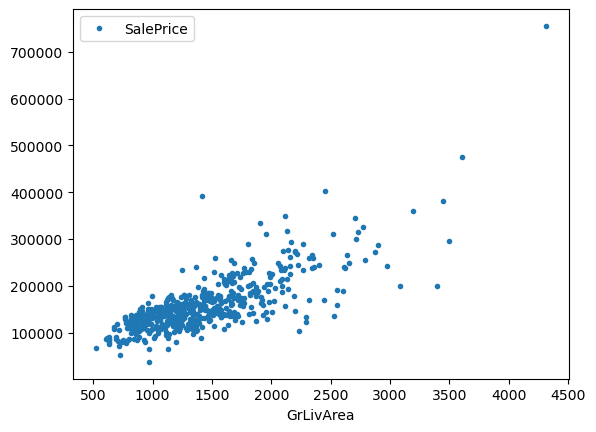

In [3]:
## Plot data
data.plot(x='GrLivArea', y='SalePrice',style='.')

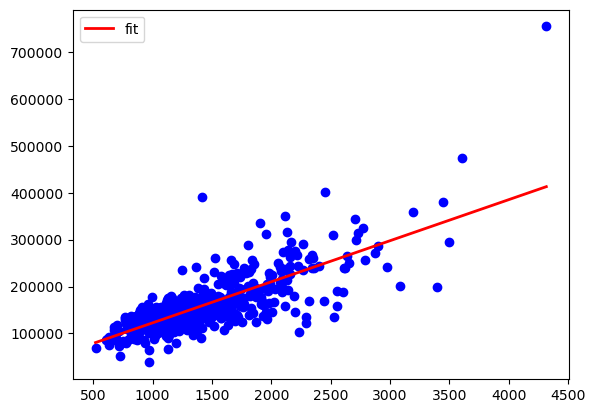

In [13]:
#First we define a plotting function because we're going to do this often and we want to reuse our code:

def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit',linewidth=2.0) ;plt.legend()

   # ## PLot the reference theoretical linear model using mand b
   # m_ref = 87.688145
   # b_ref = 34754.077892
   # linear_y_ref = linear_x * m_ref + b_ref
   # plt.plot(linear_x,linear_y_ref,'k--',label='Reference',linewidth=2.0) ;plt.legend()
    
   # # add labels to the axis
   # plt.xlabel('GrLivArea ($m^2$)',fontsize=12)
   # plt.ylabel('SalePrice ($)',fontsize=12)

# Use the fucntion 
plot_data(x=data['GrLivArea'].to_numpy(),y=data['SalePrice'].to_numpy(),m=87.688145,b=34754.077892)

In [22]:
## Define SGD linear model. 

# Define function with model with 2 parameters
def model(x,m,b):
    return m *x + b



#### The Loss Function

A _loss function_, or _objective function_, is something we define and is based on what we want to achieve. In the method of SGD, it is our goal to minimize (or make close to zero) the values calculated from the _loss function_. In our example, we ideally want the prediction of our _model_ to be equal to the actual data, though we will settle for "as close as possible".

So we will select our _loss function_ to be the [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) function:

$$ L(y_i,\hat{y_i}) = (y_i - \hat{y_i}(x_i))^2 $$

where $y_i$ is our $i^{th}$ entry in the `data['SalePrice']` vector and $\hat{y_i}$ is the prediction based on evaluting $m * x_i + b$.

This function looks like the figure below when we plot it with $x=y_i - \hat{y_i}(x_i)$ and we we want to be down near $y_i - \hat{y_i}(x_i) = 0$ which indicates that our $y_i$ is as close as possible to $\hat{y_i}$.

<p float="center">
  <img src="figures/loss_func.png" width="400" /> 
</p>

Here we crate a function that calculates this for us.

In [23]:
def loss_funtion(x,y, m,b): # Takes the ref, pred, and parameters to be optimized 
    y_predicted = model(x,m,b)
    return np.power(y-y_predicted,2)

In [24]:
## Define functions to update m and b

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db


In [25]:
## Define intial parameters
m = 1.
b = 1.0
print("Initial Parameters: \n")
print('y_i = %.2f * x + %.2f' % (m,b))

Initial Parameters: 

y_i = 1.00 * x + 1.00


In [32]:
#  PLot reference theoretical linear model using mand b
x1=data['GrLivArea'].to_numpy()
y1=data['SalePrice'].to_numpy()

# Calculate initial loss 
print("Initial Loss: \n")
l = loss_funtion(x1,y1,m,b)
l[:10] ## First 10 loss values


Initial Loss: 



array([1.01840485e+10, 6.09710460e+09, 2.17630400e+09, 6.54276184e+09,
       5.15273927e+09, 6.60885851e+09, 2.97814275e+09, 4.42270436e+09,
       3.52829813e+09, 6.97216303e+09])

Updated Parameters: 

y_i = 50.14 * x + 17587.46


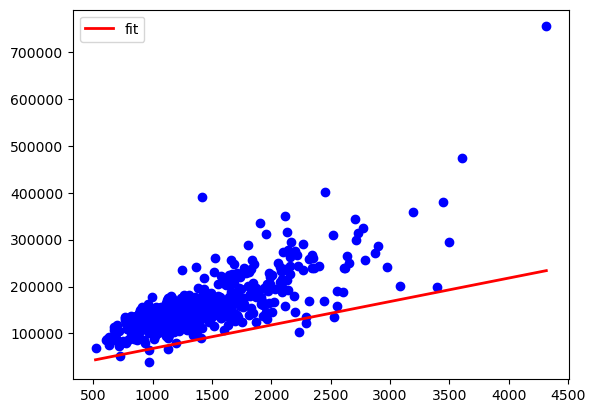

In [33]:
## Define a learning rate value and update parameters m and b
learning_rate = 1e-9
m = updated_m(x1,y1,m,b,learning_rate)
b = updated_b(x1,y1,m,b,learning_rate)
print("Updated Parameters: \n")
print('y_i = %.2f * x + %.2f' % (m,b))

# PLot the updated model with the plotting function 
plot_data(x1,y1,m,b)

In [61]:
# set our initial slope and intercept
m = 1.
b = 1.
m_calc = 87.688145
b_calc = 34754.077892
verbose = True
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []
loss_history_full = []
# Store Model Predictions
model_predictions = []
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# we run our loop N times
loop_N = 20
for i in range(loop_N):
    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # store the model predictions
    model_predictions.append(model(data_x,m,b))

    # calculate the loss value
    loss_value = np.mean(loss_funtion(data_x,data_y,m,b))

    # keep a history of our loss values
    loss_history.append(loss_value)
    loss_history_full.append(loss_funtion(data_x,data_y,m,b))
    # close/delete previous plots
    plt.close('all')


    # create a 1 by 2 plot grid
    fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
    # lot our usual output
    plot_data(data_x,data_y,m,b,ax[0])

    # here we also plot the calculated linear fit for comparison
    line_x = np.arange(data_x.min(),data_x.max())
    line_y = line_x * m_calc + b_calc
    ax[0].plot(line_x,line_y,'b-',label='calculated')
    # add a legend to the plot and x/y labels
    ax[0].legend()
    ax[0].set_xlabel('square footage')
    ax[0].set_ylabel('sale price')

    # plot the loss 
    loss_x = np.arange(0,len(loss_history))
    loss_y = np.asarray(loss_history)
    ax[1].plot(loss_x,loss_y, 'o-')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('loop step')
    ax[1].set_ylabel('loss')
    plt.show()
    # gives us time to see the plot
    time.sleep(2.0)
    # clears the plot when the next plot is ready to show.
    ipydis.clear_output(wait=True)

    # Print the updated parameters
    if verbose:
        print('Iteration %d: m = %.2f, b = %.2f' % (i,m,b))



Iteration 19: m = 89.00, b = 32737.12


In [49]:
test_x = data_y - model_predictions[-1]

In [57]:
loss_history_full[-1]

array([1.33700940e+09, 3.55294078e+08, 1.08580011e+08, 9.18644127e+08,
       5.51626032e+08, 7.34216689e+08, 1.64058737e+08, 6.74451677e+07,
       8.98436238e+06, 7.34268686e+08, 4.91968618e+08, 1.04926490e+09,
       1.03990506e+08, 5.55065372e+07, 2.44109003e+07, 3.10986230e+08,
       3.67619759e+08, 1.07640836e+09, 2.02725186e+08, 3.67626402e+07,
       8.96921437e+07, 1.82176413e+08, 5.17915769e+08, 5.28659441e+08,
       9.27525606e+08, 2.01845197e+09, 3.59540055e+08, 1.76306150e+08,
       4.74810095e+08, 2.45749814e+08, 4.64496556e+09, 3.41820911e+08,
       1.02901516e+09, 8.99472817e+08, 2.04007382e+09, 1.05868112e+10,
       4.62132802e+08, 8.40981029e+08, 6.62656528e+08, 2.77711599e+09,
       4.74607337e+07, 4.04773365e+08, 5.34656507e+07, 2.27600115e+08,
       4.10610224e+08, 5.62746220e+08, 1.36833602e+06, 1.60817926e+02,
       3.49179310e+07, 7.10255364e+07, 2.90296805e+07, 1.03737684e+07,
       8.27332593e+09, 2.43898053e+08, 4.09787009e+08, 6.10398429e+07,
      

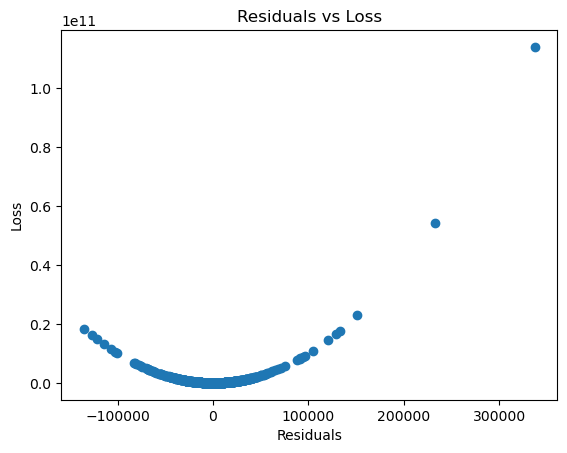

In [60]:
plt.scatter(test_x,loss_history_full[-1])
plt.xlabel('Residuals')
plt.ylabel('Loss')
plt.title('Residuals vs Loss')
plt.show()